# Part II - Factors affecting duration on FordBike
## by Chukwuebuka Ifechukwu

## Investigation Overview

This presentation will explore the data from Ford Gobike on the different individuals that took trips and from there determine the various factors that are necessary to predict if an individual will go on a trip for a long duration of time. Factors such as age, gender, user type and days of the week will be explored and see what correlation exists between them and the duration of time.


## Dataset Overview

The dataset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, information such as duration, start and end time, gender, user type as well as start and end station are recorded.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordbike = pd.read_csv("wrangled_ford_gobike_data.csv")
fordbike.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,age,member_gender,bike_share_for_all_trip,start_month,end_month,start_weekday,end_weekday
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,35,Male,No,2,3,Thursday,Friday
1,1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,47,Male,No,2,3,Thursday,Friday
2,2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,30,Other,No,2,3,Thursday,Friday
3,3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,45,Male,Yes,2,3,Thursday,Friday
4,4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,60,Male,No,2,3,Thursday,Friday


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Duration

The duration distribution of the dataset is shown where in its initial axis it is skewed to the right but when transformed to a logarithmic axis, it forms a bell curve distribution. The plot indicates that a lot of user completed their trips between 160 and 760 seconds which is between 2 and 12 hours with the most been done between 4 and 6 hours

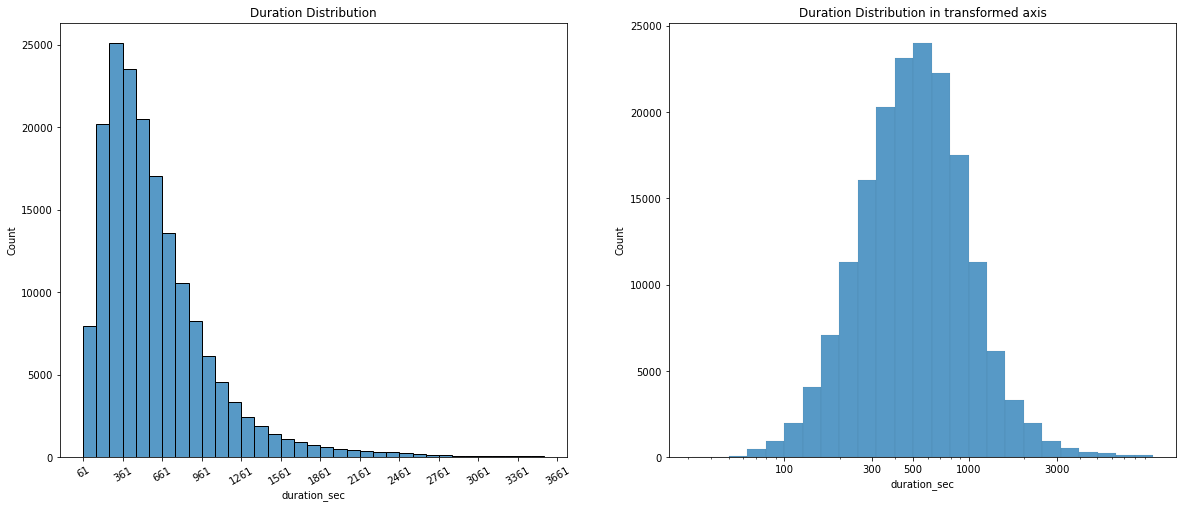

In [3]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
d_min = fordbike['duration_sec'].min()
bins = np.arange(d_min,3500+100,100)
ticks = np.arange(d_min,3500+300,300)
sb.histplot(data=fordbike,x='duration_sec',bins=bins)
plt.title("Duration Distribution")
plt.xticks(ticks,rotation=30)

#plt.figure(figsize=(10,8))
plt.subplot(1,2,2)
# converting the bin size to log form and plotting the histogram with x-axis transformed to logarithmic form
bins = 10 ** np.arange(1.5,4+0.1,0.1)
ticks = [100,300,500,1000,3000]
labels = ['{}'.format(val) for val in ticks]
sb.histplot(data=fordbike,x='duration_sec',bins=bins)
plt.title('Duration Distribution in transformed axis')
plt.xscale('log')
plt.xticks(ticks,labels)

plt.show()

## Age

Here the age distribution fo the data set will be explored where we can see that majority of the users are between 23 and 38. And when looking at the scatter plot between age and duration, a lot is clustered below duration of 200000 and for the points that are found beyond this we see that it is the ages below 60 that reach this high duration.

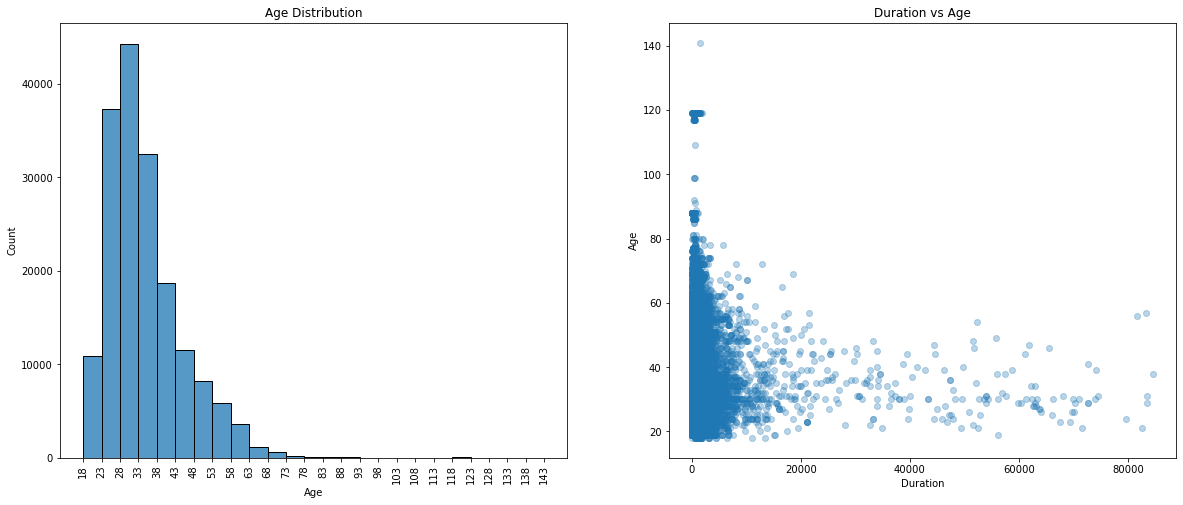

In [4]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
age_min = fordbike['age'].min()
age_max = fordbike['age'].max()
bins = np.arange(age_min,age_max+5,5)
sb.histplot(data=fordbike,x='age',bins=bins)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(bins,rotation=90)

plt.subplot(1,2,2)
plt.scatter(data=fordbike,y='age',x='duration_sec',alpha=0.3)
plt.title('Duration vs Age')
plt.ylabel('Age')
plt.xlabel('Duration')
plt.show()

## Gender

With gender, we see that Men have the significantly higher number in comparison to Female and other gender and they seem to all fall within the same age range. For the duration, it can be seen that on average the other gender went on longer trips in compared to the male and female genders.

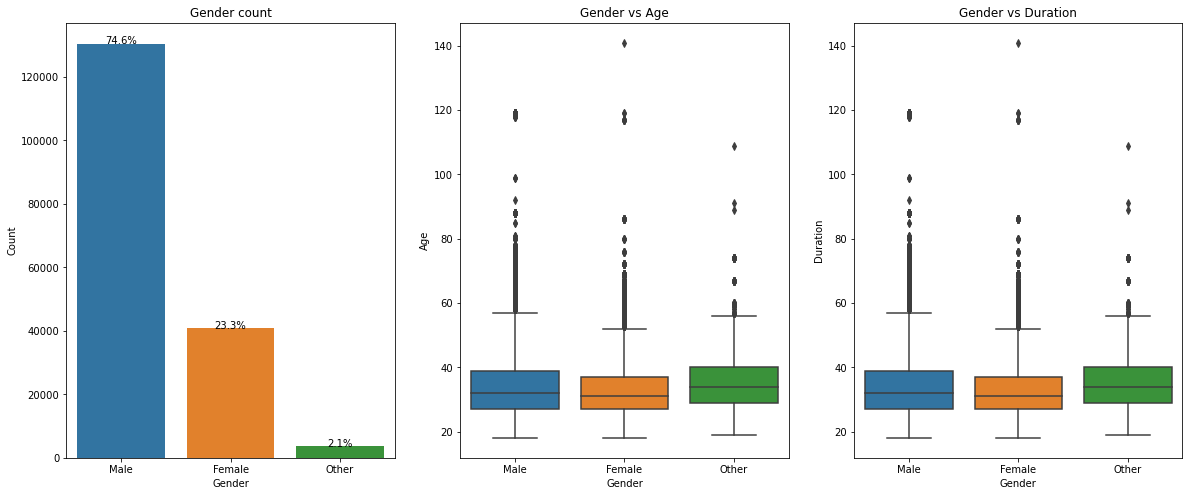

In [5]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
x = fordbike['member_gender'].value_counts()
num = x.sum() 
order=fordbike['member_gender'].value_counts().index
sb.countplot(data=fordbike,x='member_gender',order=order)
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Count')
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels): 
    # get the text property for the label to get the correct count 
    count = x[label.get_text()] 
    pct_string = '{:0.1f}%'.format(100*count/num) 
    # print the annotation just below the top of the bar 
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

plt.subplot(1,3,2)
sb.boxplot(data=fordbike,x='member_gender',y='age',order=order)
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.subplot(1,3,3)
# selecting rows in the dataset that meet the criteria of duration sec below 5000
new_df = fordbike[fordbike['duration_sec']<4000]
sb.boxplot(data=new_df,x='member_gender',y='age',order=order)
plt.title('Gender vs Duration')
plt.ylabel('Duration')
plt.xlabel('Gender')
plt.show()

## User type

The user type indicates a fascinating information because from the count, 90% of the users in the dataset are subscribers but in comparing the average duration, it would seem that it was the customer type users who went on longer trips with the bikes as depicted in the box plot.

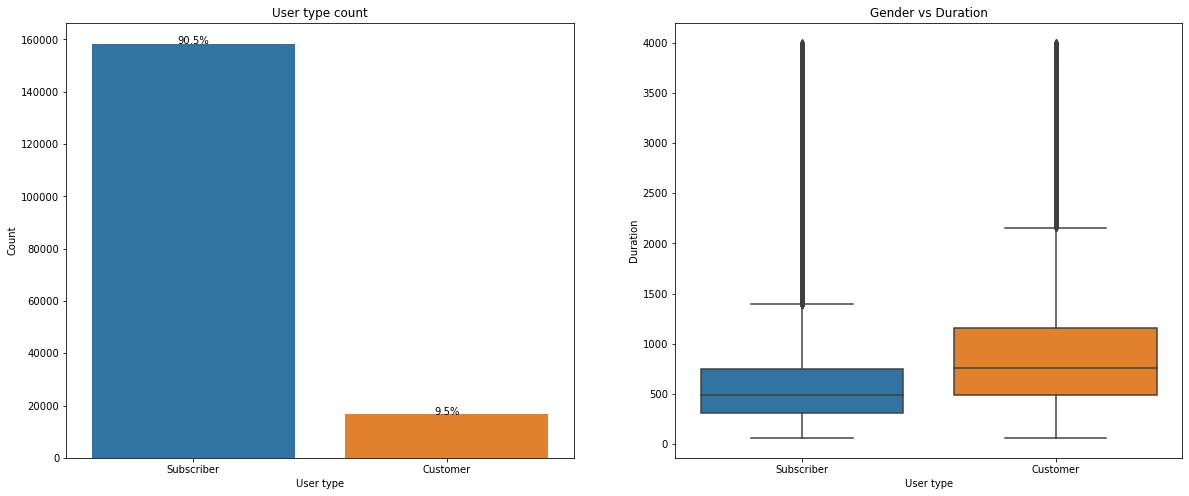

In [6]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
#plotting a bar chart for visualization
x = fordbike['user_type'].value_counts()
order=fordbike['user_type'].value_counts().index
sb.countplot(data=fordbike,x='user_type',order=order)
plt.title('User type count')
plt.xlabel('User type')
plt.ylabel('Count')
locs, labels = plt.xticks()  
num = fordbike['user_type'].value_counts().sum()

# loop through each pair of locations and labels 
for loc, label in zip(locs, labels): 
    # get the text property for the label to get the correct count 
    count = x[label.get_text()] 
    pct_string = '{:0.1f}%'.format(100*count/num) 
    # print the annotation just below the top of the bar 
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

plt.subplot(1,2,2)
new_df = fordbike[fordbike['duration_sec']<4000]
sb.boxplot(data=new_df,x='user_type',y='duration_sec')
plt.title('Gender vs Duration')
plt.ylabel('Duration')
plt.xlabel('User type')
plt.show()


## Weekdays

By looking at the weekdays and the average duration, we are able to see that the most duration were done on the weekends in particular to Sunday. This of course correlates with the knowledge that most people are free on Sundays/weekends which will allow them to go on longer trips around San Francisco.

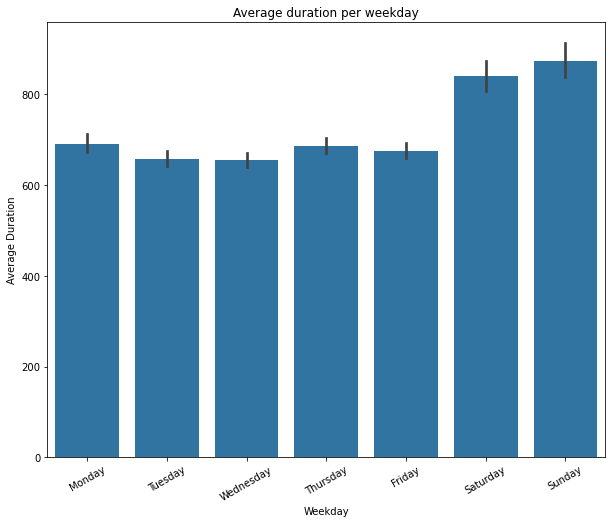

In [8]:
plt.figure(figsize=(10,8))
# creating an order for the days of the week
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#plotting using barplot from the seaborn library
chart_col = sb.color_palette()[0]
sb.barplot(data=fordbike,x='end_weekday',y='duration_sec',order=days,color=chart_col)
plt.title('Average duration per weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Duration')
plt.xticks(rotation=30)
plt.show()

## Thank you

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 